# Setup

In [1]:
#Lowercase
def lowercase(text):
    return text.lower()

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

from underthesea import word_tokenize

def tokenize(text):
    return word_tokenize(text, format="text")

import urllib
# Download vietnamese stop words
data=urllib.request.urlopen('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt').read()

# Read stop words
stopwords= [ x.decode('utf-8') for x in data.splitlines() ]
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

import re
def remove_html_url(text):
    return re.sub(r'http\S+', '', text)

In [2]:
import emoji

def remove_emoji(text):
    def get_emoji_regexp():
        # Sort emoji by length to make sure multi-character emojis are
    # matched first
        emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
        pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
        return re.compile(pattern)

    exp = get_emoji_regexp()
    return exp.sub(u'', text)

In [3]:
def preprocess_text(text):
    # '''Input : String, output : String'''
      text = lowercase(text)
      text = remove_punctuation(text)
      text = tokenize(text)
      text = remove_stopwords(text)
      text = remove_html_url(text)
      text = remove_emoji(text)
  
      return text

In [4]:
preprocess_text('TBN đúng là sướng quá hóa rồ. Vào nhánh nhẹ không chọn, chọn nhảy vào nhánh có Anh, Pháp, Bồ, Ba Lan, và nhiều khả năng là thêm Thụy Sĩ. Chắc xác định chỉ đá đến tứ kết nên cố né đương kim á quân Croatia. WC năm nay bịp hết rồi :v')

'tbn sướng hóa rồ nhánh nhẹ nhảy nhánh pháp bồ_ba lan khả_năng thụy_sĩ xác_định đá tứ_kết cố né đương_kim á_quân croatia wc bịp v'

# Load data

In [22]:
import pandas as pd
data = pd.read_csv('tgdd_product_description.csv')

In [23]:
data

,name,description
0,/dtdd/iphone-15-pro,Đặc điểm nổi bật của iPhone 15 Pro• Chế tác bộ...
1,/dtdd/iphone-15-pro,iPhone 15 Pro là một trong những chiếc điện th...
2,/dtdd/iphone-15-pro,• Chất lượng sản phẩm: Thế Giới Di Động cam kế...
3,/dtdd/iphone-15-pro,• Ưu đãi và khuyến mãi: Thế Giới Di Động thườn...
4,/dtdd/iphone-15-pro,• Hệ thống cửa hàng rộng rãi: Thế Giới Di Động...
...,...,...
3418,/may-tinh-bang/mobell-tab-8-1,Một điểm đáng chú ý khác của Mobell Tab 8.1 là...
3419,/may-tinh-bang/mobell-tab-8-1,"Hơn nữa, người dùng còn có thể đọc dữ liệu trự..."
3420,/may-tinh-bang/mobell-tab-8-1,"Máy tính bảng Mobell trang bị pin 4000 mAh, gi..."
3421,/may-tinh-bang/mobell-tab-8-1,Một điểm hạn chế là tốc độ sạc tối đa của thiế...


In [24]:
# data_grouped = data.groupby('name')['description'].apply(' '.join).reset_index()
# data_grouped

data["description_length"] = data["description"].str.len()
rows_to_drop = data[data["description_length"] < 100].index
data = data.drop(rows_to_drop)
data

,name,description,description_length
0,/dtdd/iphone-15-pro,Đặc điểm nổi bật của iPhone 15 Pro• Chế tác bộ...,369
1,/dtdd/iphone-15-pro,iPhone 15 Pro là một trong những chiếc điện th...,244
2,/dtdd/iphone-15-pro,• Chất lượng sản phẩm: Thế Giới Di Động cam kế...,209
3,/dtdd/iphone-15-pro,• Ưu đãi và khuyến mãi: Thế Giới Di Động thườn...,173
4,/dtdd/iphone-15-pro,• Hệ thống cửa hàng rộng rãi: Thế Giới Di Động...,241
...,...,...,...
3418,/may-tinh-bang/mobell-tab-8-1,Một điểm đáng chú ý khác của Mobell Tab 8.1 là...,207
3419,/may-tinh-bang/mobell-tab-8-1,"Hơn nữa, người dùng còn có thể đọc dữ liệu trự...",173
3420,/may-tinh-bang/mobell-tab-8-1,"Máy tính bảng Mobell trang bị pin 4000 mAh, gi...",155
3421,/may-tinh-bang/mobell-tab-8-1,Một điểm hạn chế là tốc độ sạc tối đa của thiế...,166


In [25]:
dataDescription = list(data['description'].values)

In [26]:
dataDescription

['Đặc điểm nổi bật của iPhone 15 Pro•\xa0Chế tác bộ bộ khung viền từ chất liệu Titanium cứng cáp•\xa0Sở hữu cấu hình mạnh mẽ bậc nhất trong ngành điện thoại•\xa0Camera hỗ trợ chụp zoom quang hoặc 3x•\xa0Hỗ trợ quay video chất lượng 4K cùng khả năng chống rung đỉnh cao•\xa0Thay thế gạt rung bằng Action Button mới lạ và tiện lợi•\xa0Chuyển đổi cổng sạc USB-C, truyền tải dữ liệu tốc độ cao',
 'iPhone 15 Pro là một trong những chiếc điện thoại thông minh được mong đợi nhất năm 2023. Với nhiều tính năng mới và cải tiến, iPhone 15 Pro chắc chắn sẽ là một lựa chọn tuyệt vời cho những người dùng đang tìm kiếm một chiếc điện thoại cao cấp.',
 '•\xa0Chất lượng sản phẩm:\xa0Thế Giới Di Động cam kết cung cấp sản phẩm iPhone 15 Pro chính hãng và đảm bảo chất lượng. Điều này giúp bạn yên tâm về xuất xứ sản phẩm và có thể tận hưởng trải nghiệm sử dụng tốt nhất.',
 '•\xa0Ưu đãi và khuyến mãi:\xa0Thế Giới Di Động thường xuyên có các chương trình khuyến mãi, giảm giá và tặng quà kèm, giúp bạn tiết kiệm 

In [27]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

In [28]:
## kiem tra ngon ngu
vi = 0
en = 0
remove_index = []
for i in range(len(dataDescription)):
  try:
    if detect(dataDescription[i]) == 'vi':
      vi+=1
    else : 
      en+=1
      remove_index.append(i)
  except:
    remove_index.append(i)
    continue

In [29]:
## loai bo cot ngon ngu
data_old = dataDescription
dataDescription = []
for i in range(len(data_old)):
  if i in remove_index:
    continue
  else : dataDescription.append(data_old[i])

In [30]:
## danh sach cac từ
corpus = []
for i in dataDescription:
  corpus = [*corpus,*i.split()]

In [31]:
corpus

['Đặc',
 'điểm',
 'nổi',
 'bật',
 'của',
 'iPhone',
 '15',
 'Pro•',
 'Chế',
 'tác',
 'bộ',
 'bộ',
 'khung',
 'viền',
 'từ',
 'chất',
 'liệu',
 'Titanium',
 'cứng',
 'cáp•',
 'Sở',
 'hữu',
 'cấu',
 'hình',
 'mạnh',
 'mẽ',
 'bậc',
 'nhất',
 'trong',
 'ngành',
 'điện',
 'thoại•',
 'Camera',
 'hỗ',
 'trợ',
 'chụp',
 'zoom',
 'quang',
 'hoặc',
 '3x•',
 'Hỗ',
 'trợ',
 'quay',
 'video',
 'chất',
 'lượng',
 '4K',
 'cùng',
 'khả',
 'năng',
 'chống',
 'rung',
 'đỉnh',
 'cao•',
 'Thay',
 'thế',
 'gạt',
 'rung',
 'bằng',
 'Action',
 'Button',
 'mới',
 'lạ',
 'và',
 'tiện',
 'lợi•',
 'Chuyển',
 'đổi',
 'cổng',
 'sạc',
 'USB-C,',
 'truyền',
 'tải',
 'dữ',
 'liệu',
 'tốc',
 'độ',
 'cao',
 'iPhone',
 '15',
 'Pro',
 'là',
 'một',
 'trong',
 'những',
 'chiếc',
 'điện',
 'thoại',
 'thông',
 'minh',
 'được',
 'mong',
 'đợi',
 'nhất',
 'năm',
 '2023.',
 'Với',
 'nhiều',
 'tính',
 'năng',
 'mới',
 'và',
 'cải',
 'tiến,',
 'iPhone',
 '15',
 'Pro',
 'chắc',
 'chắn',
 'sẽ',
 'là',
 'một',
 'lựa',
 'chọn',
 'tu

In [32]:
from collections import OrderedDict
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import re
from underthesea import pos_tag


class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 
        self.min_diff = 1e-5 
        self.steps = 10 
        self.node_weight = None 

    def remove_number(self,doc):
        doc = re.sub(" \d+", " ", doc)
        return doc
    def recovery_sentence(self,doc):
        doc = doc.replace("_"," ")
        return doc
    
    def sentence_segment(self, doc, candidate_pos, lower=None):
        """Store those words only in cadidate_pos"""
        words = []
        for i,j in pos_tag(doc):
          if j in candidate_pos : 
            word_token = i.replace(' ','_')
            words.append(word_token)
        return words

    def get_vocab(self, words):
        """Get all tokens - word_dict"""
        vocab = OrderedDict()
        i = 0
        for word in words:          
          if word not in vocab:
              vocab[word] = i
              i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()

        for i, word in enumerate(sentences):
            for j in range(i+1, i+window_size):
                if j >= len(sentences):
                    break
                pair = (word, sentences[j])
                if pair not in token_pairs:
                    token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        '''xây dựng ma trận đối xứng'''
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
        g = self.symmetrize(g)
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) 
        return g_norm

    
    def get_keywords(self, number=10):
        """in top keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        re = []
        for i, (key, value) in enumerate(node_weight.items()):
            re.append(key)
            if i > number:
                break
        return re
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):

        doc = self.remove_number(text)

        doc = self.recovery_sentence(text)

        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [33]:
label_words = []
for dataDes in dataDescription:
  try:
    if len(dataDes.split()) >= 150 :
      keywords = 40
    elif 150 > len(dataDes.split()) > 40:
      keywords = 20
    else: keywords = 10
    TextRank = TextRank4Keyword()
    TextRank.analyze(dataDes, candidate_pos = ['N','A','V'])
    a = TextRank.get_keywords(keywords)
    label_words.append(a)
  except Exception as e: 
    print(e)
    break

In [34]:
dataDescription[100]

'Màn hình iPhone 15 Plus với kích thước 6.7 inch mang lại sự thoải mái cho việc sử dụng hằng ngày, nó tạo ra một không gian rộng rãi để bạn tận hưởng nội dung đa phương tiện và công việc.'

In [35]:
label_words[100]

['6.7_inch',
 'nội_dung',
 'mang',
 'tận_hưởng',
 'lại',
 'bạn',
 'sự',
 'rộng_rãi',
 'thoải_mái',
 'không_gian',
 'kích_thước',
 'đa',
 'việc',
 'ra',
 'sử_dụng',
 'ngày',
 'tạo',
 'iPhone',
 'phương_tiện',
 'công_việc',
 'Màn_hình']

# Build model

In [36]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
x_corpus = [ i.split() for i in dataDescription]

In [38]:
y_label = []
for i in range(len(dataDescription)):
  label = [1 if j in label_words[i] else 0 for j in dataDescription[i].split()]
  y_label.append(label)

In [39]:
import numpy as np
np.array(y_label[100])

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [40]:
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(x_corpus, y_label)]
print("{} câu có độ dài in-out khác nhau.".format(sum(different_length)))

0 câu có độ dài in-out khác nhau.


In [41]:
lengths = [len(seq) for seq in x_corpus]
print("Length of longest sentence: {}".format(max(lengths)))

Length of longest sentence: 122


In [118]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(x_corpus)

sequences = tokenizer.texts_to_sequences(x_corpus)
X_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

Y_padded=tf.keras.preprocessing.sequence.pad_sequences(y_label, maxlen=max_length, dtype='int32', padding='pre', value=2.0)

In [119]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [120]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer_load = pickle.load(handle)

In [121]:
sequences_load = tokenizer_load.texts_to_sequences(x_corpus)
np.array(sequences_load[0]) - np.array(sequences[0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
Y = tf.keras.utils.to_categorical(Y_padded,num_classes=3)

In [123]:
Y_padded[100]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [124]:
Y[100]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [125]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=TEST_SIZE, random_state=42)

In [126]:
VALID_SIZE = 0.3
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=42)

In [127]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (1619, 100)
Shape of output sequences: (1619, 100, 3)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (695, 100)
Shape of output sequences: (695, 100, 3)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (409, 100)
Shape of output sequences: (409, 100, 3)


In [128]:
NUM_CLASSES = Y.shape[2]
VOCABULARY_SIZE = len(tokenizer.word_index) + 1
EMBEDDING_SIZE  = 150

In [129]:
rnn_model = tf.keras.Sequential()

rnn_model.add(tf.keras.layers.Embedding(input_dim=VOCABULARY_SIZE, output_dim=EMBEDDING_SIZE, input_shape=(max_length,), trainable=False                    
))

rnn_model.add(tf.keras.layers.SimpleRNN(128, 
              return_sequences=True  
))
rnn_model.add(tf.keras.layers.SimpleRNN(64, 
              return_sequences=True  
))

rnn_model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')))

d:\code\PBL7\.venv\lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [131]:
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 150)       │       666,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 100, 128)       │        35,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 100, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 100, 3)         │           195 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 714,709 (2.73 MB)

 Trainable params: 714,709 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
EPOCHS=10
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=64, epochs=EPOCHS, validation_data=(X_validation, Y_validation))

Epoch 1/10


26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - acc: 0.6988 - loss: 0.6360 - val_acc: 0.8662 - val_loss: 0.2994
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - acc: 0.8743 - loss: 0.2749 - val_acc: 0.9047 - val_loss: 0.1985
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - acc: 0.9232 - loss: 0.1747 - val_acc: 0.9398 - val_loss: 0.1444
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - acc: 0.9448 - loss: 0.1309 - val_acc: 0.9437 - val_loss: 0.1345
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - acc: 0.9536 - loss: 0.1120 - val_acc: 0.9435 - val_loss: 0.1340
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - acc: 0.9622 - loss: 0.0950 - val_acc: 0.9418 - val_loss: 0.1408
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - acc: 0.9686 - loss: 0.0830 - val_acc: 0.9374 - val_loss: 0.1529
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - acc: 0.9762 - loss: 0.0676 - val_acc: 0.9344 - val_loss: 0.1692
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - acc: 0.9833 - loss: 

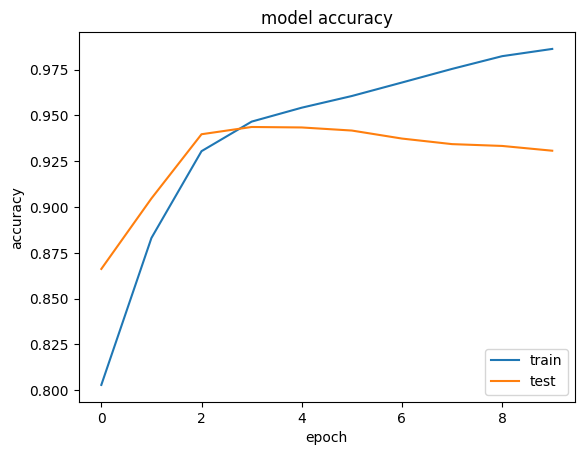

In [133]:
import matplotlib.pyplot as plt

plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()

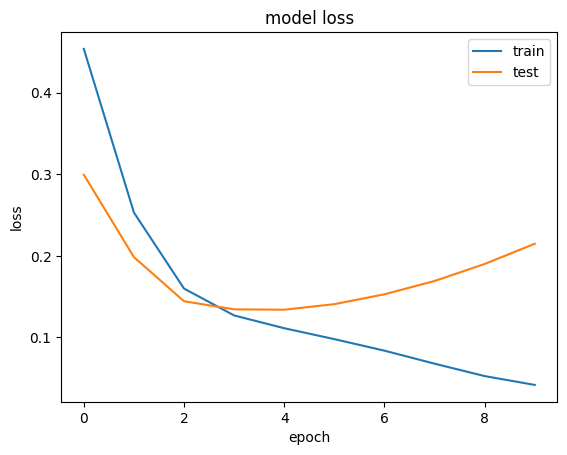

In [134]:
import matplotlib.pyplot as plt

plt.plot(rnn_training.history['loss'])
plt.plot(rnn_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper right")
plt.show()

In [135]:
loss, accuracy = rnn_model.evaluate(X_test, Y_test, verbose = 1)
print("Loss: {0},\nAccuracy: {1}".format(loss, accuracy))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9321 - loss: 0.2130
Loss: 0.21679192781448364,
Accuracy: 0.9303178191184998


In [136]:
input0 = np.expand_dims(X_test[10],axis=0)

In [137]:
X_test[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        125,  422,  775,  565,    8,    4,   49,   19,   24,   30,    9,
        708,  310,  448,   68, 1846,    2,    4,   15,   28,   76,  185,
        224,   11,  170,  220,   13,  144,    8,   71,   40,   80,  157,
        489,   33,   38,  101,    3,  239,  768,   51,   54,   27,   18,
        125,  422,  775,  565,   15,    4,  197,   71,  100,  298,    2,
        766,   41,  157,  131,    5,   81,  205,   80,   25,  152,   44,
        751])

In [138]:
predict = rnn_model.predict(input0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [139]:
predict[0].round()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [140]:
import numpy as np
np.argmax(predict[0],axis=1, out=None)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [141]:
rnn_model.save('my_model.keras')

In [142]:
from keras.models import load_model

reconstructed_model = load_model("my_model.keras")

In [264]:
text = '''Tôi muốn mua một chiếc điện thoại có cấu hình cao đủ để chơi game. 
Tôi cũng cần điện thoại có camera chụp hình đẹp'''
text_pre = preprocess_text(text)
text_pre_token = [text_pre.split()]

sequences = tokenizer.texts_to_sequences(text_pre_token)
input_padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

predict = rnn_model.predict(input_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [265]:
import numpy as np
label_key_phrases = np.argmax(predict[0],axis=1, out=None)

In [266]:
input_padded

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        514,   1,   1, 113,   1,  47,  57,   9, 142]])

In [267]:
label_key_phrases

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [268]:
text_rever = tokenizer.sequences_to_texts(input_padded)

In [269]:
text_rever_split = text_rever[0].split()

In [270]:
key_phrases = [text_rever_split[i] for i in range(len(label_key_phrases)) if label_key_phrases[i] == 1]

In [271]:
def remove_items(test_list, item): 
    # using filter() + __ne__ to perform the task 
    res = list(filter((item).__ne__, test_list)) 
    return res 

In [272]:
key_phrases = remove_items(key_phrases, '<OOV>')

In [273]:
key_phrases_nonToken = [i.replace("_"," ") for i in key_phrases]

In [274]:
key_phrases_nonToken

['game', 'camera', 'chụp']